In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_excel("new_dataset (Autosaved).xlsx")
df = pd.DataFrame(df)

In [ ]:
# df.shape

In [31]:
# df.head() # df.head(10)
# df.info()
# df.tail()  #df.tail(10)
# df.sample()  # df.sample(10)
# df.index
# df.attrs
# df.value_counts('Q2')
# df.value_counts('sjr')

# df["Q2"].value_counts().idxmax()
# df["Q2"].value_counts().max()
# df.values
# df.dtypes
# df.axes
# df.empty
# df.nunique()

In [37]:
# df.describe()
# df["Impact factor"].mean()

In [ ]:
# df.columns

In [6]:
df = df.drop(['Google Scholar Link', 'Author name', 'manuscript title', 'Journal name'], axis=1)
df = df.apply(lambda column : column.fillna(column.mean()), axis=0)
target = 'Citation'
target_values = df[target]
df = df.drop([], axis=1)
correlations = {}
for column in df.columns:
        correlation = df[column].corr(target_values)
        correlations[column] = correlation  # مقدار همبستگی را ذخیره کنید

for column , corr_value in correlations.items():
    print(f"correlation value between {column} and {target} = {corr_value}")

correlation value between No. Of Publications and Citation = 0.28461801023609457
correlation value between No. Of publications without citation and Citation = 0.14993989488784357
correlation value between The most citation and Citation = 0.7934987698810531
correlation value between Sum of Top ten citation and Citation = 0.9184045491816287
correlation value between Citation and Citation = 1.0
correlation value between h-index and Citation = 0.8221513534831874
correlation value between i10-index and Citation = 0.6063579098384908
correlation value between First publication (year) and Citation = -0.4163790304718998
correlation value between Last publication (year) and Citation = 0.0037624827519917637
correlation value between citation of the manuscript and Citation = 0.3030030358431881
correlation value between publication year and Citation = -0.14769157449883397
correlation value between publication month and Citation = 0.01941927599160004
correlation value between citation of the manuscr

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   No. Of Publications                               1048575 non-null  float64
 1   No. Of publications without citation              1048575 non-null  float64
 2   The most citation                                 1048575 non-null  float64
 3   Sum of Top ten citation                           1048575 non-null  float64
 4   Citation                                          1048575 non-null  float64
 5   h-index                                           1048575 non-null  float64
 6   i10-index                                         1048575 non-null  float64
 7   First publication (year)                          1048575 non-null  float64
 8   Last publication (year)                           1048575 non-null  floa

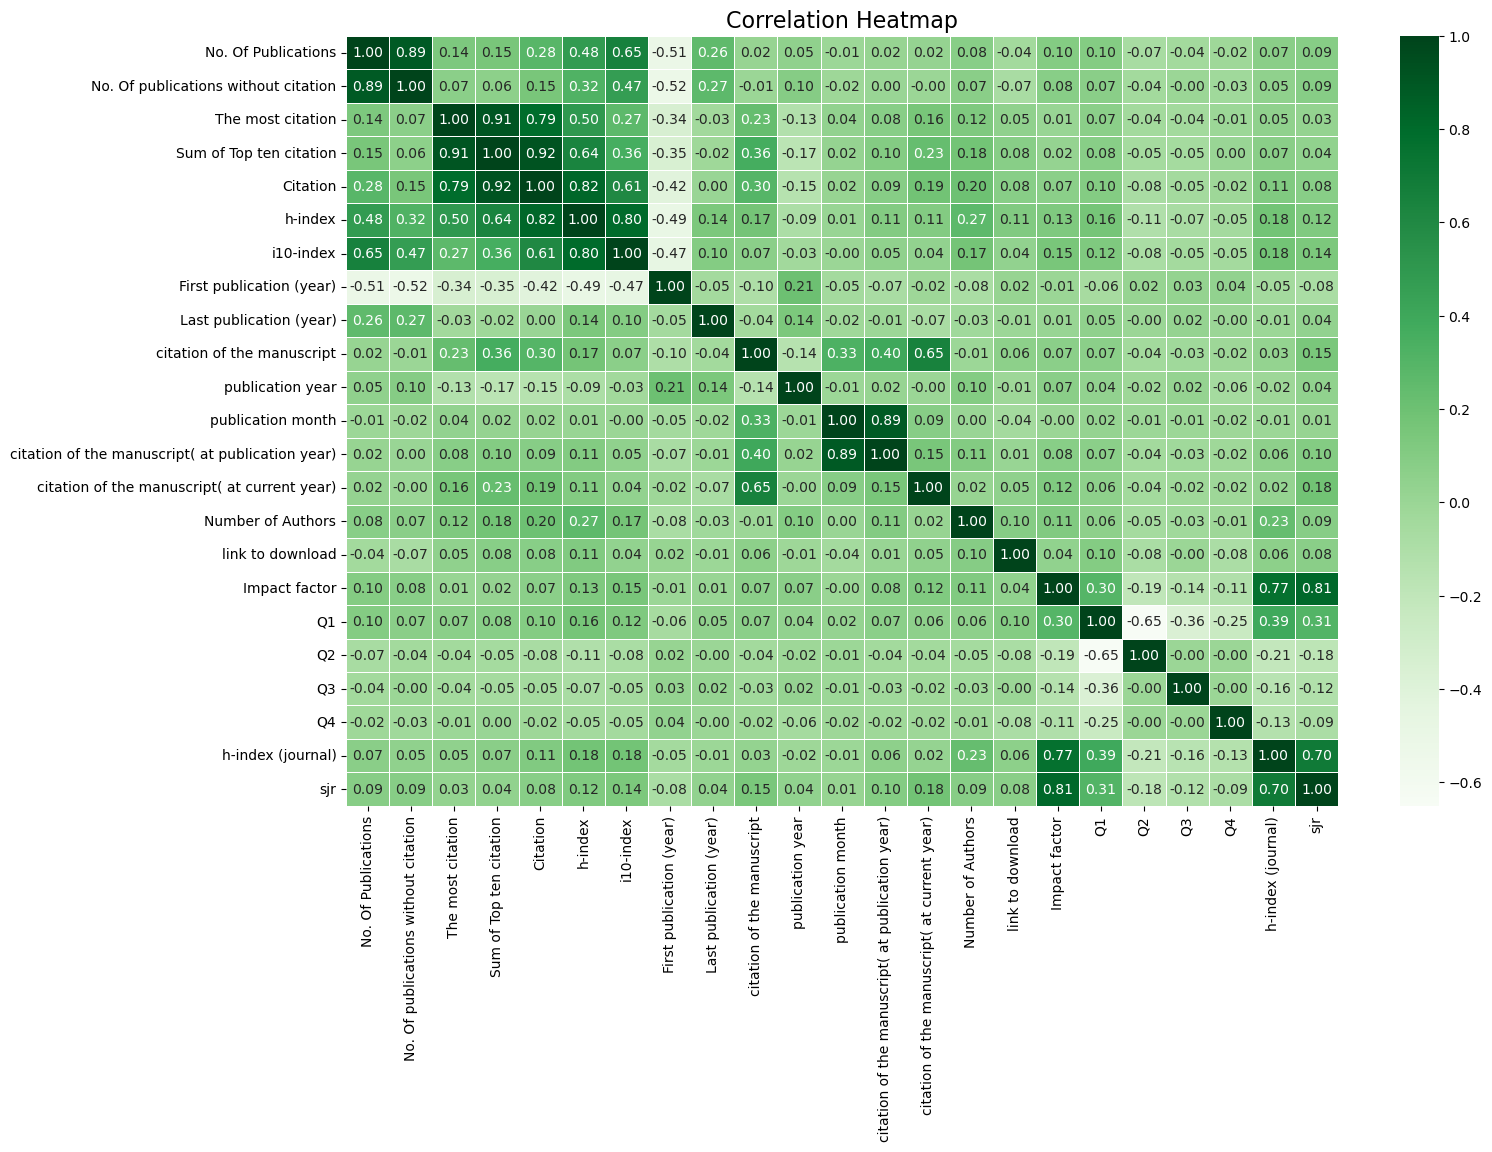

In [12]:
import seaborn as sns
correlation_matrix = df.corr() #matrix correlation
# print(correlation_matrix)
plt.figure(figsize=(16,10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



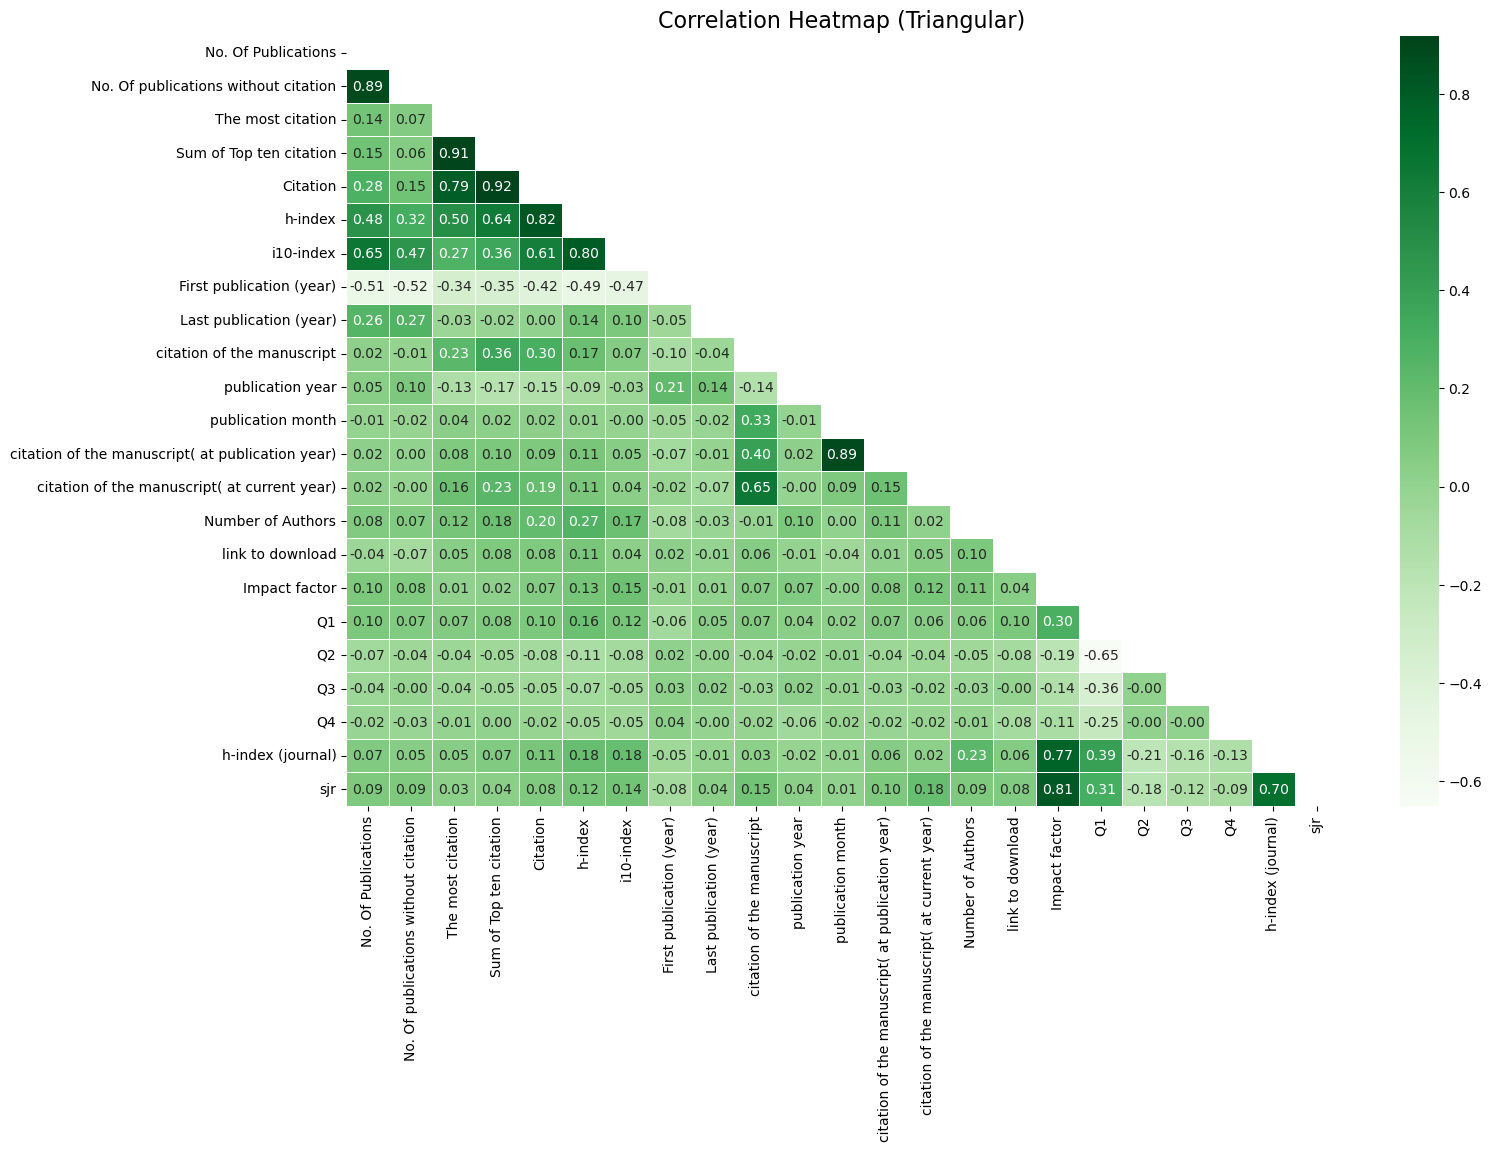

In [14]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(16, 10))  # تنظیم اندازه نمودار
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Triangular)', fontsize=16)
plt.show()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit_transform(df)

In [16]:
X = df
y = target_values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X.isnull().sum())
print(y.isnull().sum())
print(len(X), len(y))
print(X.dtypes)
print(type(y))

(838860, 23)
(838860,)
No. Of Publications                                 0
No. Of publications without citation                0
The most citation                                   0
Sum of Top ten citation                             0
Citation                                            0
h-index                                             0
i10-index                                           0
First publication (year)                            0
Last publication (year)                             0
citation of the manuscript                          0
publication year                                    0
publication month                                   0
citation of the manuscript( at publication year)    0
citation of the manuscript( at current year)        0
Number of Authors                                   0
link to download                                    0
Impact factor                                       0
Q1                                                  0
Q2   

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")


R2_score : 1.0
mean_absolute_error : 5.652347699980024e-11
mean_squared_error : 4.0339797137488506e-18


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('Poly_Features', PolynomialFeatures()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")


R2_score : 0.21488829129652598
mean_absolute_error : 4.168099367810377
mean_squared_error : 899899.5167803612


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,Lars,Ridge,Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ARDRegression())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 1.0
mean_absolute_error : 2.3056223033718105e-11
mean_squared_error : 4.239169045376865e-21


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,Lars,Ridge,Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 0.9999993640982797
mean_absolute_error : 0.018412267889409643
mean_squared_error : 0.7288741773432342


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,Lars,Ridge,Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 0.9999999999561634
mean_absolute_error : 0.00012579982060410445
mean_squared_error : 5.024577237389513e-05


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,Lars,Ridge,Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BayesianRidge())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 1.0
mean_absolute_error : 3.677389159965333e-11
mean_squared_error : 1.012965928174117e-18


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,Lars,Ridge,Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 0.9345864889853368
mean_absolute_error : 4.306221217848868
mean_squared_error : 74977.3392759768


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression,BayesianRidge,ElasticNet,Lars,Ridge,Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lars())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 1.0
mean_absolute_error : 2.1931956350370653e-11
mean_squared_error : 5.253073007165132e-22


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 0.9999456129220604
mean_absolute_error : 0.049824837524367206
mean_squared_error : 62.33877881887323


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 0.9999427407114035
mean_absolute_error : 0.06683868379381902
mean_squared_error : 65.63092304938853


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor())
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")



R2_score : 0.9999878169680373
mean_absolute_error : 0.06456275105813966
mean_squared_error : 13.964260696497167


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=30))
                  ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# pipeline = score(X_test, y_test)
r_score = r2_score(y_test, y_pred)
print(f"R2_score : {r_score}")
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error : {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"mean_squared_error : {mse}")

R2_score : 0.8407368136834638
mean_absolute_error : 6.354412039132527
mean_squared_error : 182548.37218493441
